In [4]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import time
import datetime
import json

MINIMUM_COOKING_TIME = 60*10

cookingOutput = open('cookingOutputTP2.json')
outputDict = json.load(cookingOutput)

#print outputDict

print outputDict['2010_06_23']
print outputDict['2010_06_23']['hclusters']
print outputDict['2010_06_23']['0']


if len(outputDict.keys()) > 0:
    print "##################OUTPUT######################\n"
    #print outputDict
    meanList = []
    for key in outputDict:
        date = key
        if outputDict[key] is not None:
            if int(outputDict[key]["hclusters"]) > 0:
                clusters = outputDict[key]["clusters"]
                #print "clusternr:",clusters
                clusteri = 0
                while clusteri < clusters:
                    print date, outputDict[key][str(clusteri)][3],outputDict[key][str(clusteri)][4]
                    meanList.append(outputDict[key][str(clusteri)][1])
                    clusteri +=1
            else:
                print date, " No Clusters longer than: ", MINIMUM_COOKING_TIME
    
    
    mean = np.mean(meanList)
    stddev = np.std(meanList)

    import math
    print "mean: ", time.strftime('%H:%M:%S', time.gmtime(mean))
    print "stddev: ", time.strftime('%H:%M:%S', time.gmtime(stddev))
    print "########################################\n"
    for key in outputDict:
        date = key
        if outputDict[key] is not None:
            if outputDict[key]["hclusters"] > 0 :
                clusters = outputDict[key]["clusters"]
                #print "clusternr:",clusters
                clusterint = 0
                while clusterint < clusters:
                    clusteri = str(clusterint)
                    clusterMean = outputDict[key][clusteri][1]
                    print date, "cooking",outputDict[key][clusteri][0] , "start:",outputDict[key][clusteri][3],"end:",outputDict[key][clusteri][4],"mean:",outputDict[key][clusteri][1] ," deviation: ", (clusterMean-mean)/ (60*60*12), " %" 
                    clusterint +=1
            else:
                print date, " No Clusters longer than: ", MINIMUM_COOKING_TIME, " ms"

{u'hclusters': 3, u'1': [1, 36522.4285, u'10:08:42', u'10:00:09', u'10:17:15'], u'0': [0, 16847.888, u'04:40:47', u'04:23:43', u'04:57:52'], u'2': [2, 45245.24249999999, u'12:34:05', u'12:15:30', u'12:52:40'], u'clusters': 3, u'type': u'H'}
3
[0, 16847.888, u'04:40:47', u'04:23:43', u'04:57:52']
##################OUTPUT######################

2010_05_06  No Clusters longer than:  600
2010_05_07  No Clusters longer than:  600
2010_06_23 04:23:43 04:57:52
2010_06_23 10:00:09 10:17:15
2010_06_23 12:15:30 12:52:40
2010_06_22 04:32:35 04:40:37
2010_06_22 11:01:15 11:27:21
2010_06_25 08:40:15 08:49:17
2010_06_25 14:47:07 15:05:13
2010_06_25 12:49:38 12:59:40
2010_06_25 11:49:04 12:13:28
2010_06_24 21:18:55 21:25:56
2010_06_27 05:26:19 05:30:20
2010_06_26 03:54:52 03:56:52
2010_06_29 10:51:15 11:22:24
2010_06_28 09:41:34 10:21:45
2010_05_04  No Clusters longer than:  600
2010_05_08  No Clusters longer than:  600
2010_05_09  No Clusters longer than:  600
2010_07_13  No Clusters longer than:  6

In [8]:
import collections
from collections import defaultdict

## just to collect cookingMeantimes
## in format 16:10:34 : 2, 12:15:34 : 1
## is later going to be converted to series and resampled
learningMeanTimeCounterDict = defaultdict(int)
## second for other half of data
cookingMeanTimeCounterDict2 = defaultdict(int)


## collecting
orderedDict = collections.OrderedDict(sorted(outputDict.items()))
keyLength = len(orderedDict.keys())
print "keyLength:", keyLength
## collect values from first half of data
for counter, key in enumerate(orderedDict.keys()):
    #if counter<keyLength/2:
    #print 1, counter,",", key
    if outputDict[key]["hclusters"] > 0 :
        clusters = outputDict[key]["clusters"]
        #print "clusternr:",clusters
        clusterint = 0
        while clusterint < clusters:
            clusteri = str(clusterint)
            clusterMean = outputDict[key][clusteri][1]
            clusterMeanTime = outputDict[key][clusteri][2]
            #print date, "cooking",outputDict[key][clusteri][0] , "start:",outputDict[key][clusteri][3],"end:",outputDict[key][clusteri][4],"mean:",outputDict[key][clusteri][1] ," deviation: ", (clusterMean-mean)/ (60*60*12), " %" 
                    
            if counter<keyLength/2:
                print  1, counter,",", key, clusterMeanTime
                ## append cookTimes to dict with counter
                learningMeanTimeCounterDict[clusterMeanTime] += 1
            else:
                print  2, counter,",", key, clusterMeanTime
                ## append cookTimes to dict with counter
                cookingMeanTimeCounterDict2[clusterMeanTime] += 1
            clusterint +=1
    '''
    ## collect values from second hald of data
    else:
        if outputDict[key]["hcluster"] > 0 :
                clusters = outputDict[key]["clusters"]
                #print "clusternr:",clusters
                clusterint = 0
                while clusterint < clusters:
                    clusteri = str(clusterint)
                    clusterMean = outputDict[key][clusteri][1]
                    clusterMeanTime = outputDict[key][clusteri][2]
                    #print date, "cooking",outputDict[key][clusteri][0] , "start:",outputDict[key][clusteri][3],"end:",outputDict[key][clusteri][4],"mean:",outputDict[key][clusteri][1] ," deviation: ", (clusterMean-mean)/ (60*60*12), " %" 
                    print  2, counter,",", key, clusterMeanTime
                    ## append cookTimes to dict with counter
                    cookingMeanTimeCounterDict2[clusterMeanTime] += 1
                    clusterint +=1
        #print 2, counter,",", key
    '''    
#print learningMeanTimeCounterDict

keyLength: 127
1 0 , 2010_04_22 13:01:07
1 1 , 2010_04_23 09:36:17
1 1 , 2010_04_23 11:17:34
1 2 , 2010_04_24 04:08:46
1 2 , 2010_04_24 17:52:55
1 2 , 2010_04_24 16:59:45
1 4 , 2010_04_26 04:26:29
1 4 , 2010_04_26 08:35:36
1 29 , 2010_05_21 16:00:47
1 29 , 2010_05_21 10:12:12
1 29 , 2010_05_21 12:04:41
1 30 , 2010_05_22 04:22:42
1 30 , 2010_05_22 10:30:48
1 30 , 2010_05_22 09:30:02
1 31 , 2010_05_23 06:59:51
1 32 , 2010_05_24 11:02:04
1 33 , 2010_05_25 10:17:55
1 34 , 2010_05_26 08:20:46
1 34 , 2010_05_26 10:22:08
1 34 , 2010_05_26 09:28:24
1 34 , 2010_05_26 19:12:25
1 34 , 2010_05_26 15:56:04
1 34 , 2010_05_26 15:12:53
1 35 , 2010_05_27 11:12:08
1 36 , 2010_05_28 04:37:21
1 36 , 2010_05_28 15:08:28
1 37 , 2010_05_29 13:50:04
1 37 , 2010_05_29 08:05:33
1 37 , 2010_05_29 09:10:20
1 39 , 2010_05_31 06:00:25
1 39 , 2010_05_31 09:40:55
1 40 , 2010_06_01 19:48:06
1 40 , 2010_06_01 08:06:48
1 40 , 2010_06_01 10:46:47
1 40 , 2010_06_01 09:30:40
1 41 , 2010_06_02 05:30:06
1 41 , 2010_06_02 10:

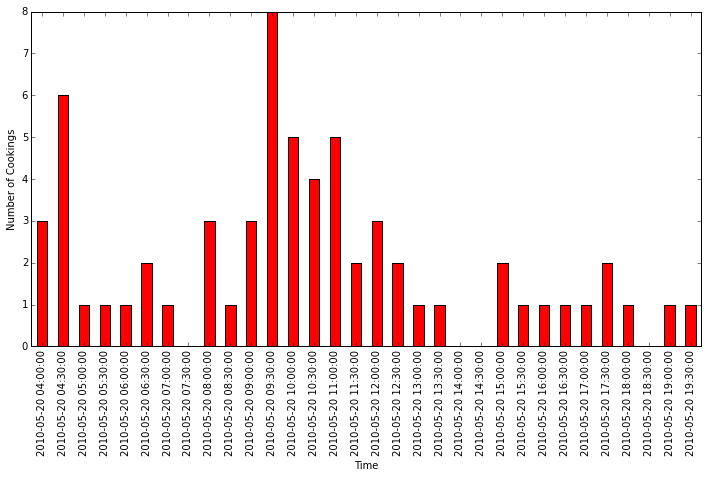

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

from datetime import datetime
## convert to series ##
cookingMeanTimeSeries = Series()
#datetime.datetime.strptime(key, '%H:%M:%S').time()

## we have to add a DATE to a key of MeanTimes to be able to resample 
date = '20-05-2010'
for key in learningMeanTimeCounterDict:
    keyDateString = date + ' ' + key
    #print keyDateString
    keyDate = datetime.strptime(keyDateString, '%d-%m-%Y %H:%M:%S')
    cookingMeanTimeSeries = cookingMeanTimeSeries.set_value(keyDate, learningMeanTimeCounterDict[key]) 

#cookingMeanTimeSeries
cookingMeanTimeSeries.index = pd.to_datetime(cookingMeanTimeSeries.index)
cookingMeanTimeSeries.index = pd.DatetimeIndex(cookingMeanTimeSeries.index)
type(cookingMeanTimeSeries.index)
#cmtg15 = cookingMeanTimeSeries.groupby(pd.TimeGrouper('15Min')).sum()
#cmtg15.plot(kind='bar')

# cookingMeanTimeGrouped1
cmtg130 = cookingMeanTimeSeries.groupby(pd.TimeGrouper('30Min')).sum()
fig = plt.figure()
plt.xlabel('Time')
plt.ylabel('Number of Cookings')
cmtg130.plot(kind='bar', color='r')

In [12]:
group60minLearned = cmtg130.groupby(pd.TimeGrouper('60Min')).sum()
group60minToLearn = cmtg230.groupby(pd.TimeGrouper('60Min')).sum()

## learned cookings ##
group60minLearned = group60minLearned.fillna(0)
group60minLearned.std
group60minLearned.plot()

group60minToLearn = group60minToLearn.fillna(0)
group60minToLearn.plot()


## needed for second method ##
# calculate probabilities
group60LearedDf = pd.DataFrame(group60minLearned, columns=['countevents'])
group60ToLearnDf = pd.DataFrame(group60minToLearn, columns=['countevents'])
group60LearedDf['eventprobability'] = group60LearedDf.countevents.map( lambda row: (row*100)/group60LearedDf['countevents'].sum() )
group60ToLearnDf['eventprobability'] = group60ToLearnDf.countevents.map( lambda row: (row*100)/group60ToLearnDf['countevents'].sum() )
group60LearedDf.plot(x=group60LearedDf.index, y='eventprobability')
group60LearedDf.index = pd.to_datetime(group60LearedDf.index)
print "deviation:", group60LearedDf.eventprobability.std()
#ci = group60LearedDf.aggregate(lambda x: np.std(x) / x.count() * 1.96)
group60LearedDf.head()

NameError: name 'cmtg230' is not defined

In [362]:
## needed for second method ##
group60LearedDf["stddiff"] = group60LearedDf.eventprobability - group60LearedDf.eventprobability.std()

In [363]:
group60LearedDf["tocluster"] = group60LearedDf.stddiff.map(lambda row: row > 0)
group60LearedDf["sec"] = group60LearedDf.index.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )
group60ToLearnDf["sec"] = group60ToLearnDf.index.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )
group60LearedDf

,countevents,eventprobability,stddiff,tocluster,sec
2010-05-20 04:00:00,9,14.0625,8.927601,True,14400
2010-05-20 05:00:00,2,3.1250,-2.009899,False,18000
2010-05-20 06:00:00,3,4.6875,-0.447399,False,21600
2010-05-20 07:00:00,1,1.5625,-3.572399,False,25200
2010-05-20 08:00:00,4,6.2500,1.115101,True,28800
2010-05-20 09:00:00,11,17.1875,12.052601,True,32400
2010-05-20 10:00:00,9,14.0625,8.927601,True,36000
2010-05-20 11:00:00,7,10.9375,5.802601,True,39600
2010-05-20 12:00:00,5,7.8125,2.677601,True,43200
2010-05-20 13:00:00,2,3.1250,-2.009899,False,46800


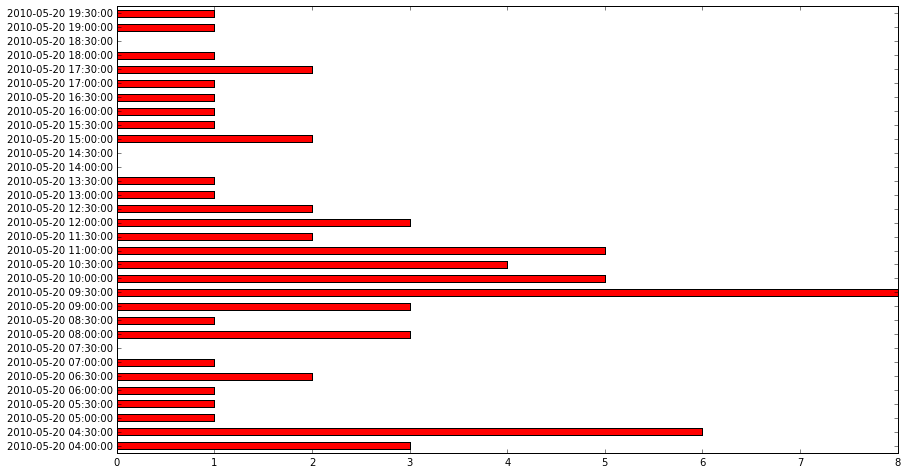

In [105]:
cmtg130.plot(kind='barh', color='r')

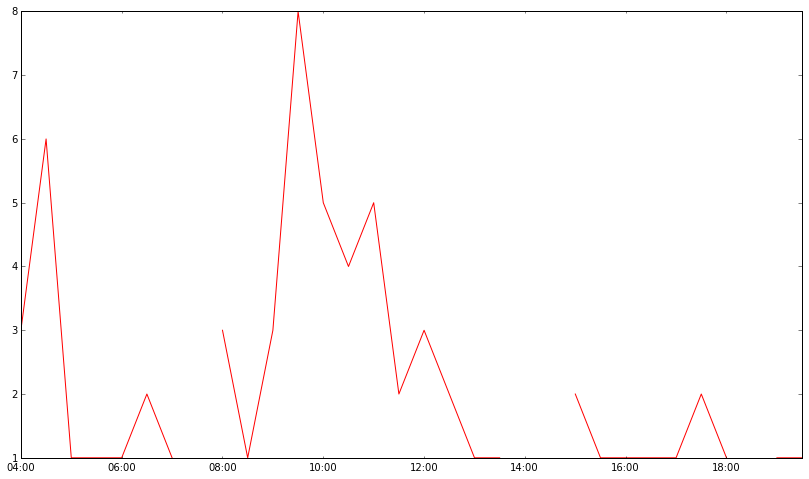

In [106]:
cmtg130.plot(kind='line', color='r')

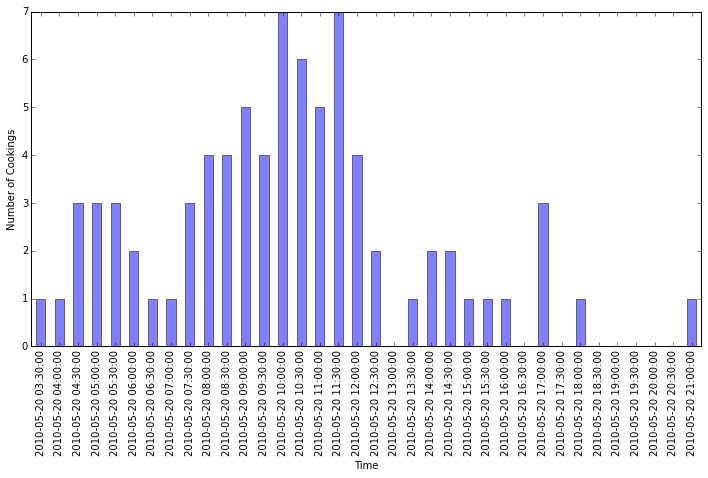

In [7]:
## second portion of data ##
## convert to series ##
cookingMeanTimeSeries2 = Series()
#datetime.datetime.strptime(key, '%H:%M:%S').time()

## we have to add a DATE to a key of MeanTimes to be able to resample 
date = '20-05-2010'
for key in cookingMeanTimeCounterDict2:
    keyDateString = date + ' ' + key
    #print keyDateString
    keyDate = datetime.strptime(keyDateString, '%d-%m-%Y %H:%M:%S')
    cookingMeanTimeSeries2 = cookingMeanTimeSeries2.set_value(keyDate, cookingMeanTimeCounterDict2[key]) 

#cookingMeanTimeSeries
cookingMeanTimeSeries2.index = pd.to_datetime(cookingMeanTimeSeries2.index)
cookingMeanTimeSeries2.index = pd.DatetimeIndex(cookingMeanTimeSeries2.index)
type(cookingMeanTimeSeries2.index)
#cmtg15 = cookingMeanTimeSeries2.groupby(pd.TimeGrouper('15Min')).sum()
#cmtg15.plot(kind='bar')

cmtg230 = cookingMeanTimeSeries2.groupby(pd.TimeGrouper('30Min')).sum()
## PLOT TOGETHER ##
fig = plt.figure()
cmtg230.plot(kind='bar', color='b', alpha=.5)
plt.xlabel('Time')
plt.ylabel('Number of Cookings')
plt.show(fig)




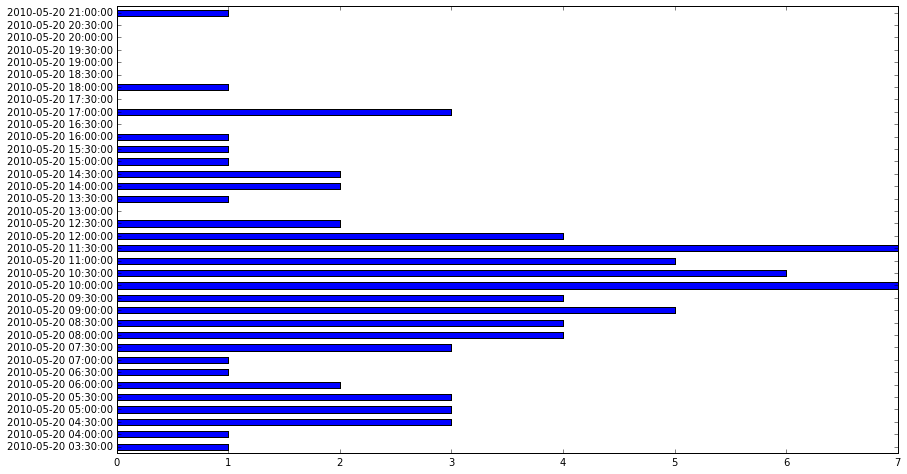

In [108]:
cmtg230.plot(kind='barh', color='b')

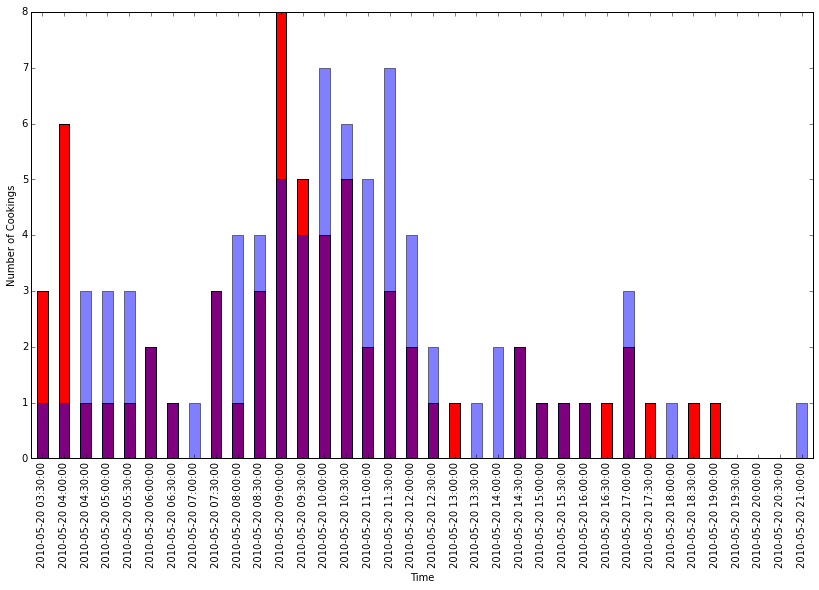

In [109]:
## PLOT TOGETHER ##
fig = plt.figure()
ax = fig.add_subplot(111)
cmtg130.plot(kind='bar', ax=ax, color='r', label="Learned")
cmtg230.plot(kind='bar', ax=ax, color='b', alpha=.5, label="New")
plt.xlabel('Time')
plt.ylabel('Number of Cookings')
plt.show(fig)

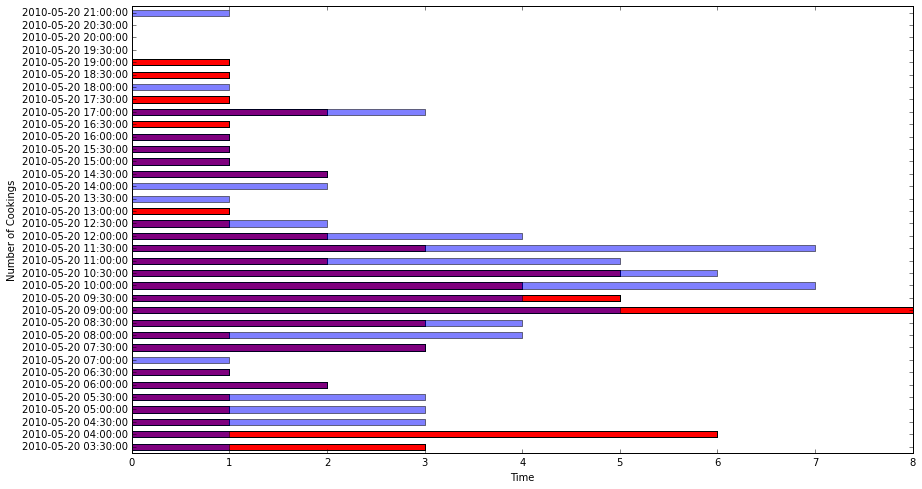

In [315]:
## PLOT TOGETHER ##
fig = plt.figure()
ax = fig.add_subplot(111)
cmtg130.plot(kind='barh', ax=ax, color='r')
cmtg230.plot(kind='barh', ax=ax, color='b', alpha=.5)
plt.xlabel('Time')
plt.ylabel('Number of Cookings')
plt.show(fig)

In [319]:
## TODO ##
## find hit/mis rate for method1 (hourly comparison)##
#pd.Series(list(set(s1).intersection(set(s2))))
list(set(cmtg130) & (set(cmtg230)))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

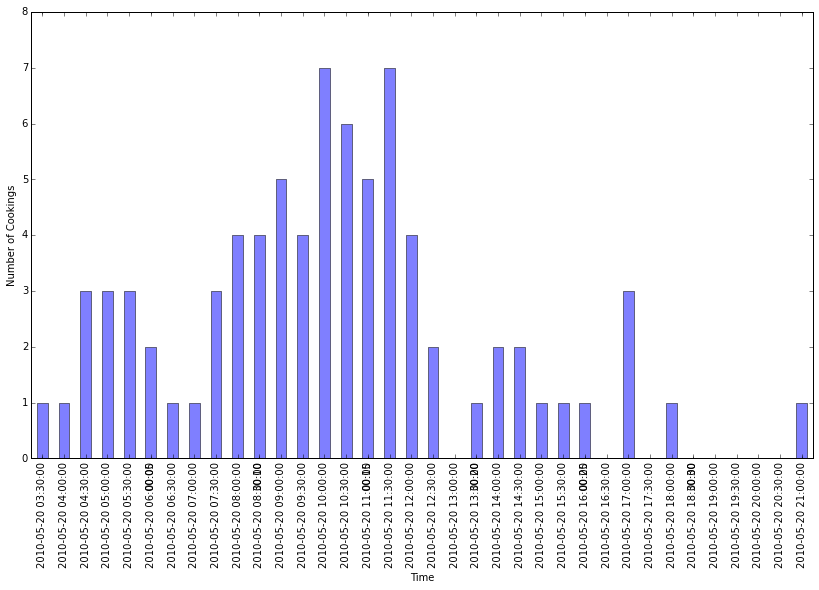

In [111]:
## PLOT TOGETHER ##
fig = plt.figure()
ax = fig.add_subplot(111)
cmtg130.plot(kind='line', ax=ax, color='r')
cmtg230.plot(kind='bar', ax=ax, color='b', alpha=.5)
plt.xlabel('Time')
plt.ylabel('Number of Cookings')
plt.show(fig)

In [112]:
## Adaptive Learning ##
adaptiveLearningStructure = {}

adaptiveMeanTimeCounterDict = defaultdict(int)
dayHitMissLoggerDict = {}
def learnIt(dayKey, meanTime):
    # init dayHitMissDict
    if dayKey not in dayHitMissLoggerDict:
        dayHitMissLoggerDict[dayKey] = {}
        dayHitMissLoggerDict[dayKey]["hit"] = 0
        dayHitMissLoggerDict[dayKey]["miss"] = 0
        
        
    if meanTime.hour in adaptiveMeanTimeCounterDict:
        print "Hit"
        adaptiveMeanTimeCounterDict[meanTime.hour] += 1
        dayHitMissLoggerDict[dayKey]["hit"] += 1
    else:
        adaptiveMeanTimeCounterDict[meanTime.hour] =1
        print "Miss"
        dayHitMissLoggerDict[dayKey]["miss"] += 1
    return meanTime.hour

print "keysLength:", len(orderedDict.keys())

for counter, key in enumerate(orderedDict.keys()):
    #if counter<keyLength/2:
    #print 1, counter,",", key
    if outputDict[key]["hcluster"] > 0 :
        clusters = outputDict[key]["clusters"]
        #print "clusternr:",clusters
        clusterint = 0
        while clusterint < clusters:
            clusteri = str(clusterint)
            clusterMean = outputDict[key][clusteri][1]
            clusterMeanTime = outputDict[key][clusteri][2]
            clusterMeanTimeObject = datetime.strptime(clusterMeanTime, '%H:%M:%S')
            #print date, "cooking",outputDict[key][clusteri][0] , "start:",outputDict[key][clusteri][3],"end:",outputDict[key][clusteri][4],"mean:",outputDict[key][clusteri][1] ," deviation: ", (clusterMean-mean)/ (60*60*12), " %" 
                    
            print key, " ", learnIt(key, clusterMeanTimeObject)
            clusterint +=1
            
print adaptiveMeanTimeCounterDict
print dayHitMissLoggerDict

keysLength: 127
2010_04_22   Miss
13
2010_04_23   Miss
9
2010_04_23   Miss
11
2010_04_24   Miss
4
2010_04_24   Miss
17
2010_04_24   Miss
16
2010_04_26   Hit
4
2010_04_26   Miss
8
2010_05_21   Hit
16
2010_05_21   Miss
10
2010_05_21   Miss
12
2010_05_22   Hit
4
2010_05_22   Hit
10
2010_05_22   Hit
9
2010_05_23   Miss
6
2010_05_24   Hit
11
2010_05_25   Hit
10
2010_05_26   Hit
8
2010_05_26   Hit
10
2010_05_26   Hit
9
2010_05_26   Miss
19
2010_05_26   Miss
15
2010_05_26   Hit
15
2010_05_27   Hit
11
2010_05_28   Hit
4
2010_05_28   Hit
15
2010_05_29   Hit
13
2010_05_29   Hit
8
2010_05_29   Hit
9
2010_05_31   Hit
6
2010_05_31   Hit
9
2010_06_01   Hit
19
2010_06_01   Hit
8
2010_06_01   Hit
10
2010_06_01   Hit
9
2010_06_02   Miss
5
2010_06_02   Hit
10
2010_06_04   Hit
11
2010_06_05   Hit
10
2010_06_05   Hit
12
2010_06_06   Hit
9
2010_06_07   Hit
4
2010_06_07   Hit
9
2010_06_07   Miss
7
2010_06_09   Hit
17
2010_06_09   Hit
12
2010_06_09   Hit
9
2010_06_09   Hit
11
2010_06_10   Hit
9
2010_06_12   

In [113]:
#pd.DataFrame(dayHitMissLoggerDict.items(), columns=['Date', 'Hit', 'Miss'])
#dayHitMissLoggerDict.items()
#pd.DataFrame(dayHitMissLoggerDict.items()., columns=['Date', 'Hits'])
from pandas.io.json import json_normalize
json_normalize(dayHitMissLoggerDict)

,2010_04_22.hit,2010_04_22.miss,2010_04_23.hit,2010_04_23.miss,2010_04_24.hit,2010_04_24.miss,2010_04_26.hit,2010_04_26.miss,2010_05_21.hit,2010_05_21.miss,...,2010_08_20.hit,2010_08_20.miss,2010_08_22.hit,2010_08_22.miss,2010_08_23.hit,2010_08_23.miss,2010_08_25.hit,2010_08_25.miss,2010_08_26.hit,2010_08_26.miss
0,0,1,0,2,0,3,1,1,1,2,...,3,0,3,0,1,0,2,0,1,0


In [114]:
dayHitMissLoggerDictOrdered = collections.OrderedDict(sorted(dayHitMissLoggerDict.items()))

hitsColumn = [ int(row['hit']) for row in dayHitMissLoggerDictOrdered.values() ]
missColumn = [ int(row['miss']) for row in dayHitMissLoggerDictOrdered.values() ]

hitsColumn

hitMissDf = pd.DataFrame(dayHitMissLoggerDictOrdered.keys(), columns=['Date'])



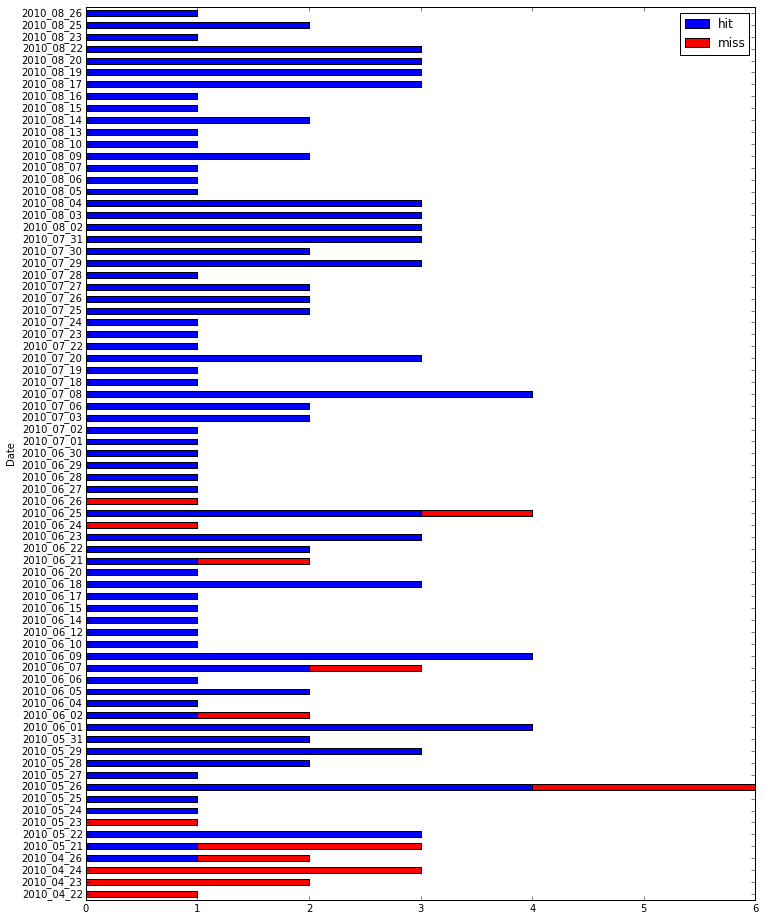

In [115]:
## plot adaptiveLearning Hit/Miss rate

hitMissDf["hit"] = hitsColumn
hitMissDf["miss"] = missColumn
hitMissDf['Date'] = pd.to_datetime(hitMissDf['Date'])
#hitMissDf.sort('Date')

from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r']), None, len(hitMissDf)))

mpl.rcParams['figure.figsize'] = (12.0, 16.0)
hitMissDf.plot(kind="barh", x='Date',stacked=True,color=my_colors)

#hitMissDf.sort('Date')
#hitMissDf.Date.order
#hitMissDf

In [324]:
## Second Method (Clustering) ##
mpl.rcParams['figure.figsize'] = (14.0, 8.0)

# create DF from dict
## first one for learned data ##
learningMeanTimeCounterDict.keys()
learnedCookingTimesDF = pd.DataFrame(learningMeanTimeCounterDict.items(), columns=['CMeanTime', 'number'])
learnedCookingTimesDF['CMeanTime'] = pd.to_datetime(learnedCookingTimesDF['CMeanTime'])
learnedCookingTimesDF.head()

## second one for comparison data ##
#learningMeanTimeCounterDict.keys()
newCookingTimesDF = pd.DataFrame(cookingMeanTimeCounterDict2.items(), columns=['CMeanTime', 'number'])
newCookingTimesDF['CMeanTime'] = pd.to_datetime(newCookingTimesDF['CMeanTime'])
newCookingTimesDF.head()

,CMeanTime,number
0,2015-10-20 17:06:14,1
1,2015-10-20 09:49:57,1
2,2015-10-20 10:41:54,1
3,2015-10-20 17:09:03,1
4,2015-10-20 04:52:09,1


In [325]:
## first half of data
learnedCookingTimesDF['sec'] = learnedCookingTimesDF.CMeanTime.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )
## second half of data
newCookingTimesDF['sec'] = newCookingTimesDF.CMeanTime.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )

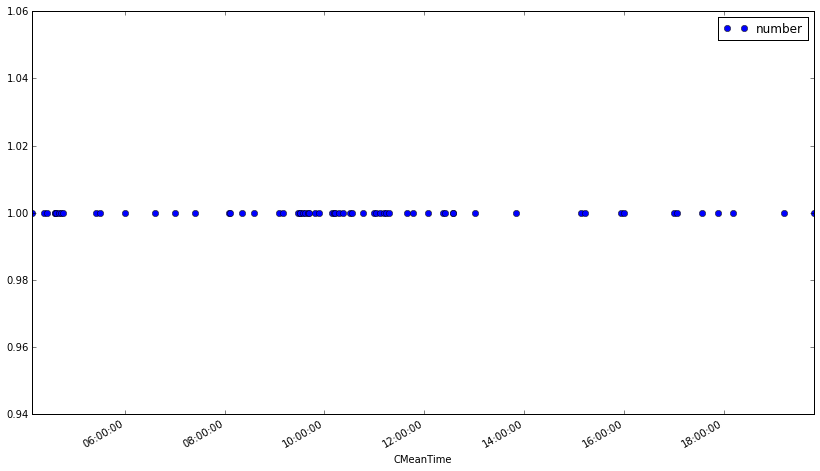

In [119]:
learnedCookingTimesDF.plot(x=learnedCookingTimesDF.CMeanTime, y="number", style='o')

In [175]:
#### Synchronise two dataframes ####
## needed for second method ##
#group60LearedDf["stddiff"] = group60LearedDf.eventprobability - group60LearedDf.eventprobability.std()

#list(group60LearedDf.between_time('5:00','5:01').values)[0][3]
learnedCookingTimesDF["tocluster"] = learnedCookingTimesDF.CMeanTime.map( lambda x:  list(group60LearedDf.between_time(str(x.hour) +':00', str(x.hour) +':01').values)[0][3])
learnedCookingTimesDF[learnedCookingTimesDF["tocluster"]==True].head()

,CMeanTime,number,sec,theshit,tocluster
0,2015-10-16 08:06:48,1,29208,"2010-05-20 08:00:00 True Freq: 60T, Name: t...",True
1,2015-10-16 08:35:36,1,30936,"2010-05-20 08:00:00 True Freq: 60T, Name: t...",True
2,2015-10-16 09:36:17,1,34577,"2010-05-20 09:00:00 True Freq: 60T, Name: t...",True
5,2015-10-16 09:40:19,1,34819,"2010-05-20 09:00:00 True Freq: 60T, Name: t...",True
6,2015-10-16 11:02:04,1,39724,"2010-05-20 11:00:00 True Freq: 60T, Name: t...",True


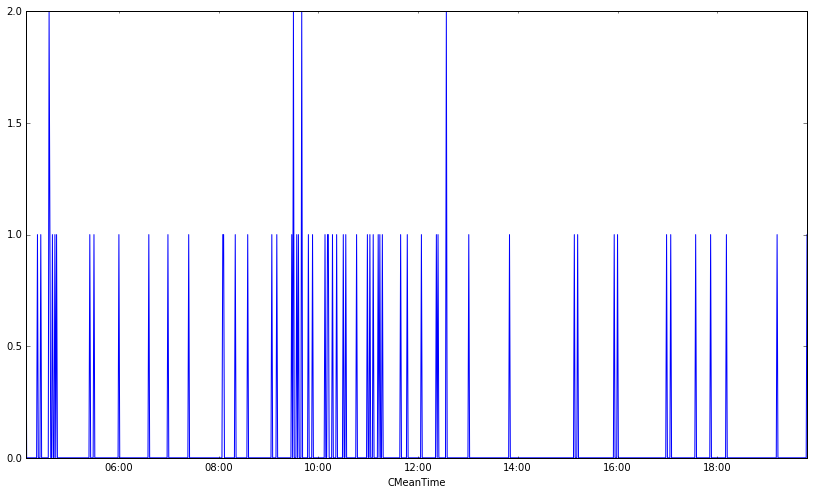

In [160]:
# create Series from df
#index_values = pd.date_range("00:00", "23:59", freq="1min").time
s = pd.Series(data=learnedCookingTimesDF.number.values, index=pd.to_datetime(learnedCookingTimesDF.CMeanTime))
#s = s.reindex(pd.date_range("00:00", "23:59", freq="1min").time, fill_value=0)
# regroup
s = s.groupby(pd.TimeGrouper('1Min')).sum()
s = s.fillna(0)
#s=s.reindex_like(index_values)
s.plot()

In [165]:
print len(learnedCookingTimesDF[(learnedCookingTimesDF.tocluster==True)].number.values)
print len(learnedCookingTimesDF.number.values)

45
64


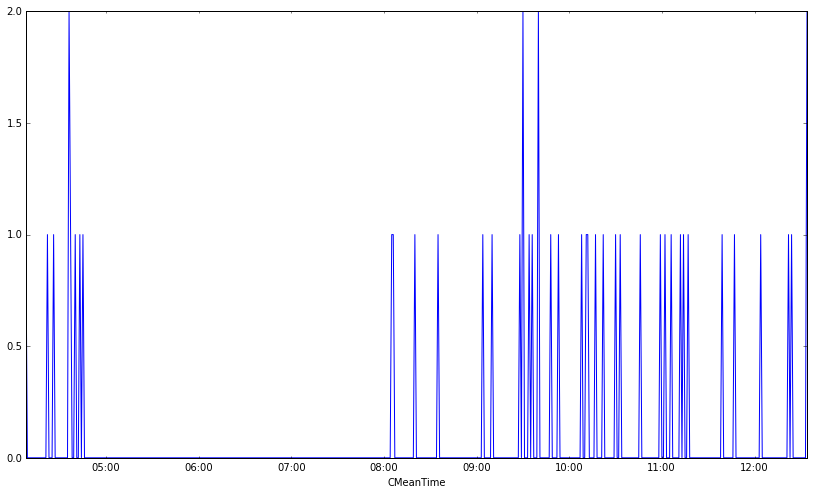

In [170]:
learnedCookingTimesDF2 = pd.DataFrame(learnedCookingTimesDF[(learnedCookingTimesDF.tocluster==True)])
## to compare when values are filtered
# create Series from df
s12 = pd.Series(data=learnedCookingTimesDF2.number.values, index=pd.to_datetime(learnedCookingTimesDF2.CMeanTime))

# regroup
s12 = s12.groupby(pd.TimeGrouper('1Min')).sum()
s12 = s12.fillna(0)
#s=s.reindex_like(index_values)
s12.plot()

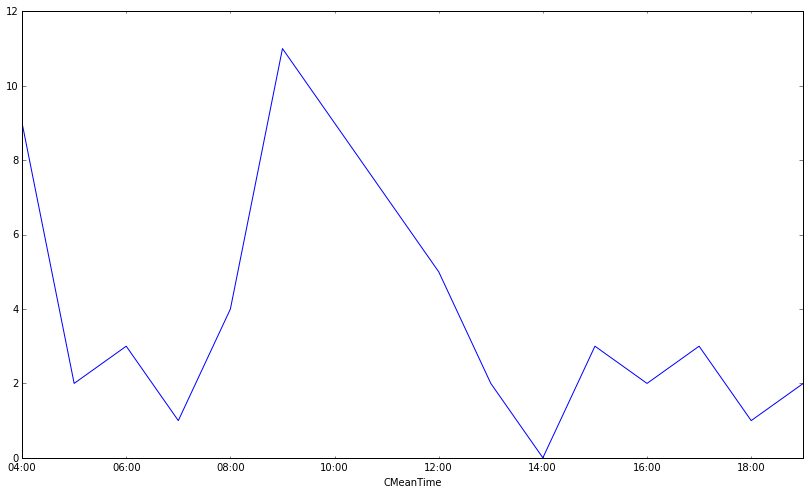

In [64]:
s2 = s.groupby(pd.TimeGrouper('60Min')).sum()
s2 = s2.fillna(0)
#s=s.reindex_like(index_values)
s2.plot()

In [65]:
# create DF out of grouped Series
df = pd.DataFrame(index=s2.index.values,data=s2.values,columns=['number'])
df['sec'] = df.index.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )

In [66]:
df.head()

,number,sec
2015-10-16 04:00:00,9,14400
2015-10-16 05:00:00,2,18000
2015-10-16 06:00:00,3,21600
2015-10-16 07:00:00,1,25200
2015-10-16 08:00:00,4,28800


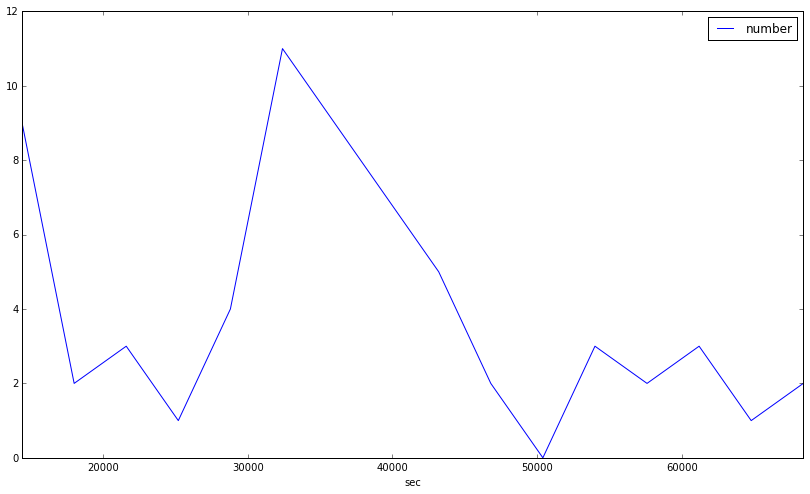

In [67]:
df.plot(x='sec', y='number')

In [81]:
learnedCookingTimesDF.head()

,CMeanTime,number,sec
0,2015-10-16 08:06:48,1,29208
1,2015-10-16 08:35:36,1,30936
2,2015-10-16 09:36:17,1,34577
3,2015-10-16 18:11:43,1,65503
4,2015-10-16 05:25:40,1,19540


In [204]:
learnedCookingTimesDF2.head()

,CMeanTime,number,sec,tocluster,hcluster
0,2015-10-16 08:06:48,1,29208,True,2
1,2015-10-16 08:35:36,1,30936,True,2
2,2015-10-16 09:36:17,1,34577,True,4
5,2015-10-16 09:40:19,1,34819,True,4
6,2015-10-16 11:02:04,1,39724,True,4


In [357]:
data = learnedCookingTimesDF2[['sec','number']].values
# add some value just to be visible
learnedCookingTimesDF['number'] = learnedCookingTimesDF['number']+3
data2 = learnedCookingTimesDF[['sec','number']].values
#newCookingTimesDF['number'] = newCookingTimesDF['number']+5
newData = newCookingTimesDF[['sec','number']].values

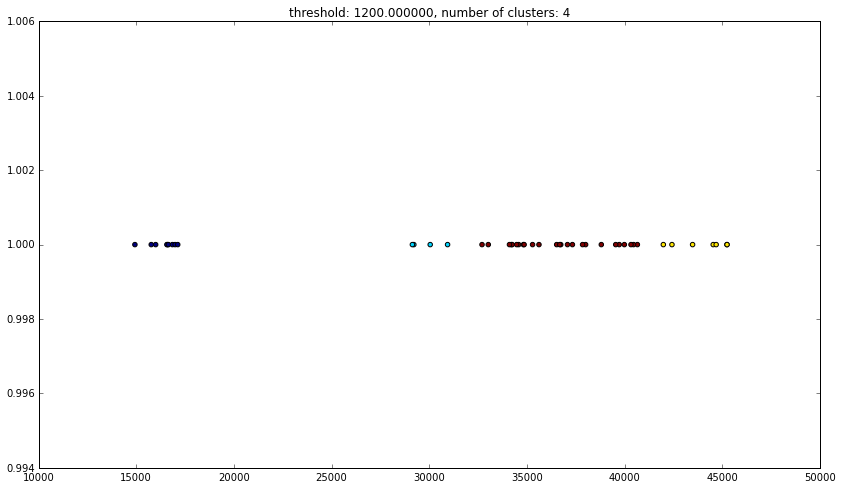

[2 2 4 4 4 4 1 2 4 3 3 3 4 4 4 4 3 3 4 4 4 3 1 4 4 4 4 4 4 1 1 2 4 4 1 4 4
 4 1 4 1 4 3 1 1]


In [358]:
import scipy.cluster.hierarchy as hcluster

# clustering
thresh = 1200
clusters = hcluster.fclusterdata(data, thresh, criterion="distance")

# plotting
plt.scatter(*np.transpose(data), c=clusters)
#plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()
print clusters

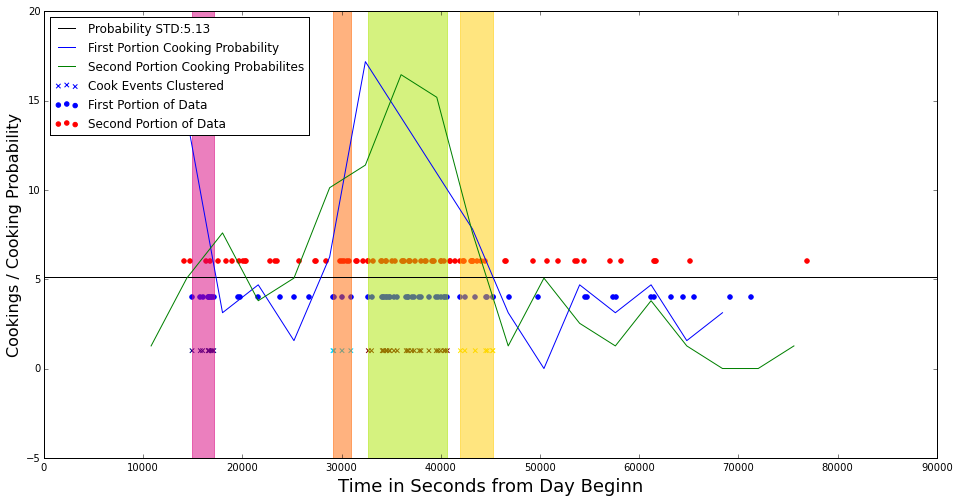

In [366]:
## append cluster# to datapoints
for cluster in set(clusters):
    for point in data[clusters==cluster, 0]:
        #print point , "c:", cluster
        learnedCookingTimesDF2.loc[learnedCookingTimesDF2.sec == point, 'hcluster'] = cluster

        
#learnedCookingTimesDF2.drop('theshit', axis=1, inplace=True)

#for cluster in set(learnedCookingTimesDF2.hcluster.values):
#    print "cluster:",cluster, learnedCookingTimesDF2[learnedCookingTimesDF2.hcluster==cluster].CMeanTime.min()

########### plot some shit ##############
clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(*np.transpose(data), c=clusters, label='Cook Events Clustered', marker="x")
text = 'ddd'#str(dframes4.datetime.min().date()) + "\n"
for cluster in set(learnedCookingTimesDF2.hcluster.values):
    plt.axvspan(learnedCookingTimesDF2[learnedCookingTimesDF2.hcluster==cluster].sec.min(),learnedCookingTimesDF2[learnedCookingTimesDF2.hcluster==cluster].sec.max(), color=clr[int(cluster)], alpha=0.5)

plt.axhline(y=group60LearedDf.eventprobability.std(), linewidth=1, color = 'k', label="Probability STD:"+str(round(group60LearedDf.eventprobability.std(),2)))
ax.plot(*np.transpose(group60LearedDf[["sec","eventprobability"]].values), label='First Portion Cooking Probability')
ax.plot(*np.transpose(group60ToLearnDf[["sec","eventprobability"]].values), label='Second Portion Cooking Probabilites')
ax.scatter(*np.transpose(data2), color='blue',label='First Portion of Data', marker="o")
ax.scatter(*np.transpose(newData), color='red',label='Second Portion of Data', marker="o")
plt.xlabel('Time in Seconds from Day Beginn', fontsize=18)
plt.ylabel('Cookings / Cooking Probability', fontsize=16)
plt.legend(loc='upper left');
#plt.set_title("BLAA")
#plt.axvline(50)
plt.show(fig)

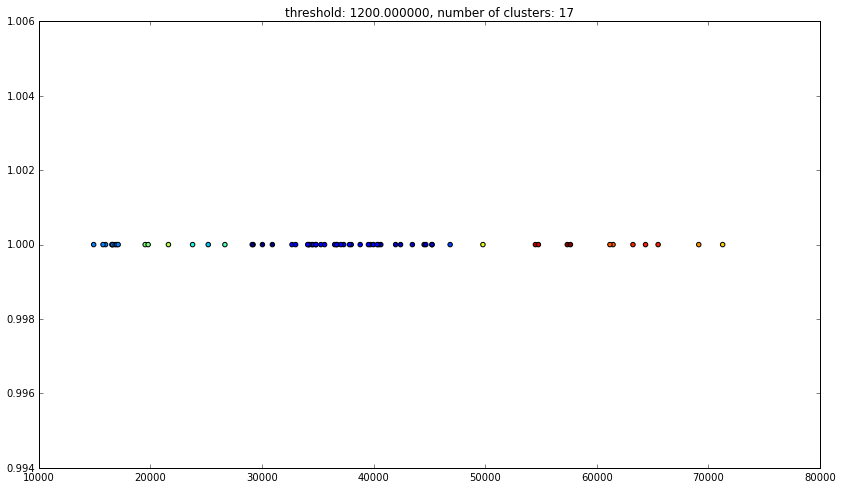

In [186]:
import scipy.cluster.hierarchy as hcluster
CT = learnedCookingTimesDF[['sec','number']].values
data = CT
# clustering
thresh = 1200
clusters = hcluster.fclusterdata(data, thresh, criterion="distance")

# plotting
plt.scatter(*np.transpose(data), c=clusters)
#plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

In [2]:
a = learnedCookingTimesDF2[['sec','number']].values
fig, axes23 = plt.subplots(2, 3)

for method, axes in zip(['single', 'complete'], axes23):
    z = hcluster.linkage(a, method=method)

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 3
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 3

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hcluster.fcluster(z, num_clust1, 'maxclust')
    part2 = hcluster.fcluster(z, num_clust2, 'maxclust')

    clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(a[part == cluster, 0], a[part == cluster, 1], 
                       color=clr[cluster])

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()

NameError: name 'learnedCookingTimesDF2' is not defined